In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
import os
from numpy import loadtxt

# load catalogs
cat_path = os.path.expandvars("$ALL_CCFRWORK/SFH/tng100/phot_TNG100_dylan_143.csv")
phot_cat = pd.read_csv(cat_path)
sfh_path = os.path.expandvars("$ALL_CCFRWORK/SFH/tng100/cats_SFH/")
wl = loadtxt(os.path.expandvars('$ALL_CCFRWORK/SFH/tng100/wl.csv'), delimiter=',')/10**4

#index pandas table
shids = phot_cat['subhaloIDs']
phot_cat.set_index("subhaloIDs", inplace=True)
phot_cat.head()

,wfpc2_f439w,isaac_ks,iras_12,jwst_f356w,scuba_450wb,wfc3_uvis_f218w,pacs_100,buser_b,i2300,wfc3_ir_f140w,...,irac_1,megacam_g,cfht_i,suprimecam_g,cfht_b,u,steidel_i,steidel_g,jwst_f090w,cfht_r
subhaloIDs,,,,,,,,,,,,,,,,,,,,,
0.0,-24.320395,-26.400793,-25.570631,-25.705349,-27.993994,-19.922083,-29.543755,-24.434834,-19.953180,-26.496119,...,-25.699606,-24.806679,-25.988924,-24.726246,-24.452705,-23.045837,-25.952877,-24.729931,-26.154514,-25.559128
1.0,-22.322693,-24.340235,-23.589722,-23.651627,-26.012091,-18.069931,-27.561872,-22.433220,-18.100878,-24.443514,...,-23.645901,-22.796421,-23.954924,-22.717957,-22.450821,-21.072277,-23.920242,-22.721848,-24.115135,-23.533825
2.0,-22.888912,-24.635635,-24.749037,-24.024393,-27.284708,-20.652218,-28.834435,-22.966372,-20.656942,-24.726887,...,-24.021671,-23.251173,-24.256485,-23.188526,-22.983938,-21.858454,-24.222851,-23.192707,-24.410805,-23.867899
3.0,-21.823645,-23.439501,-23.449230,-22.838253,-25.939741,-19.421650,-27.489502,-21.893003,-19.425941,-23.534393,...,-22.835077,-22.159718,-23.094719,-22.101603,-21.910982,-20.788572,-23.063381,-22.106621,-23.239454,-22.730686
4.0,-20.946497,-22.775061,-22.521406,-22.115164,-25.059923,-18.133543,-26.609619,-21.037191,-18.140949,-22.885548,...,-22.110655,-21.354948,-22.422365,-21.285709,-21.054770,-19.818100,-22.389780,-21.289774,-22.573605,-22.025644


In [12]:
tab = np.zeros((10, 143))
for i, (shid, row) in enumerate(phot_cat.iterrows()):
    if i >= 10:
        break
    arr = row.array
    tab[i, :] = row.array

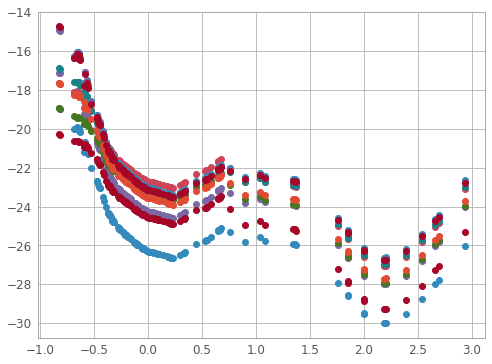

In [20]:
plt.plot(np.log10(wl), tab.T, 'o')

In [7]:
shids[:10]

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [8]:
shids[-10:]

[688.0, 695.0, 717.0, 727.0, 736.0, 758.0, 764.0, 799.0, 800.0, 17185.0]

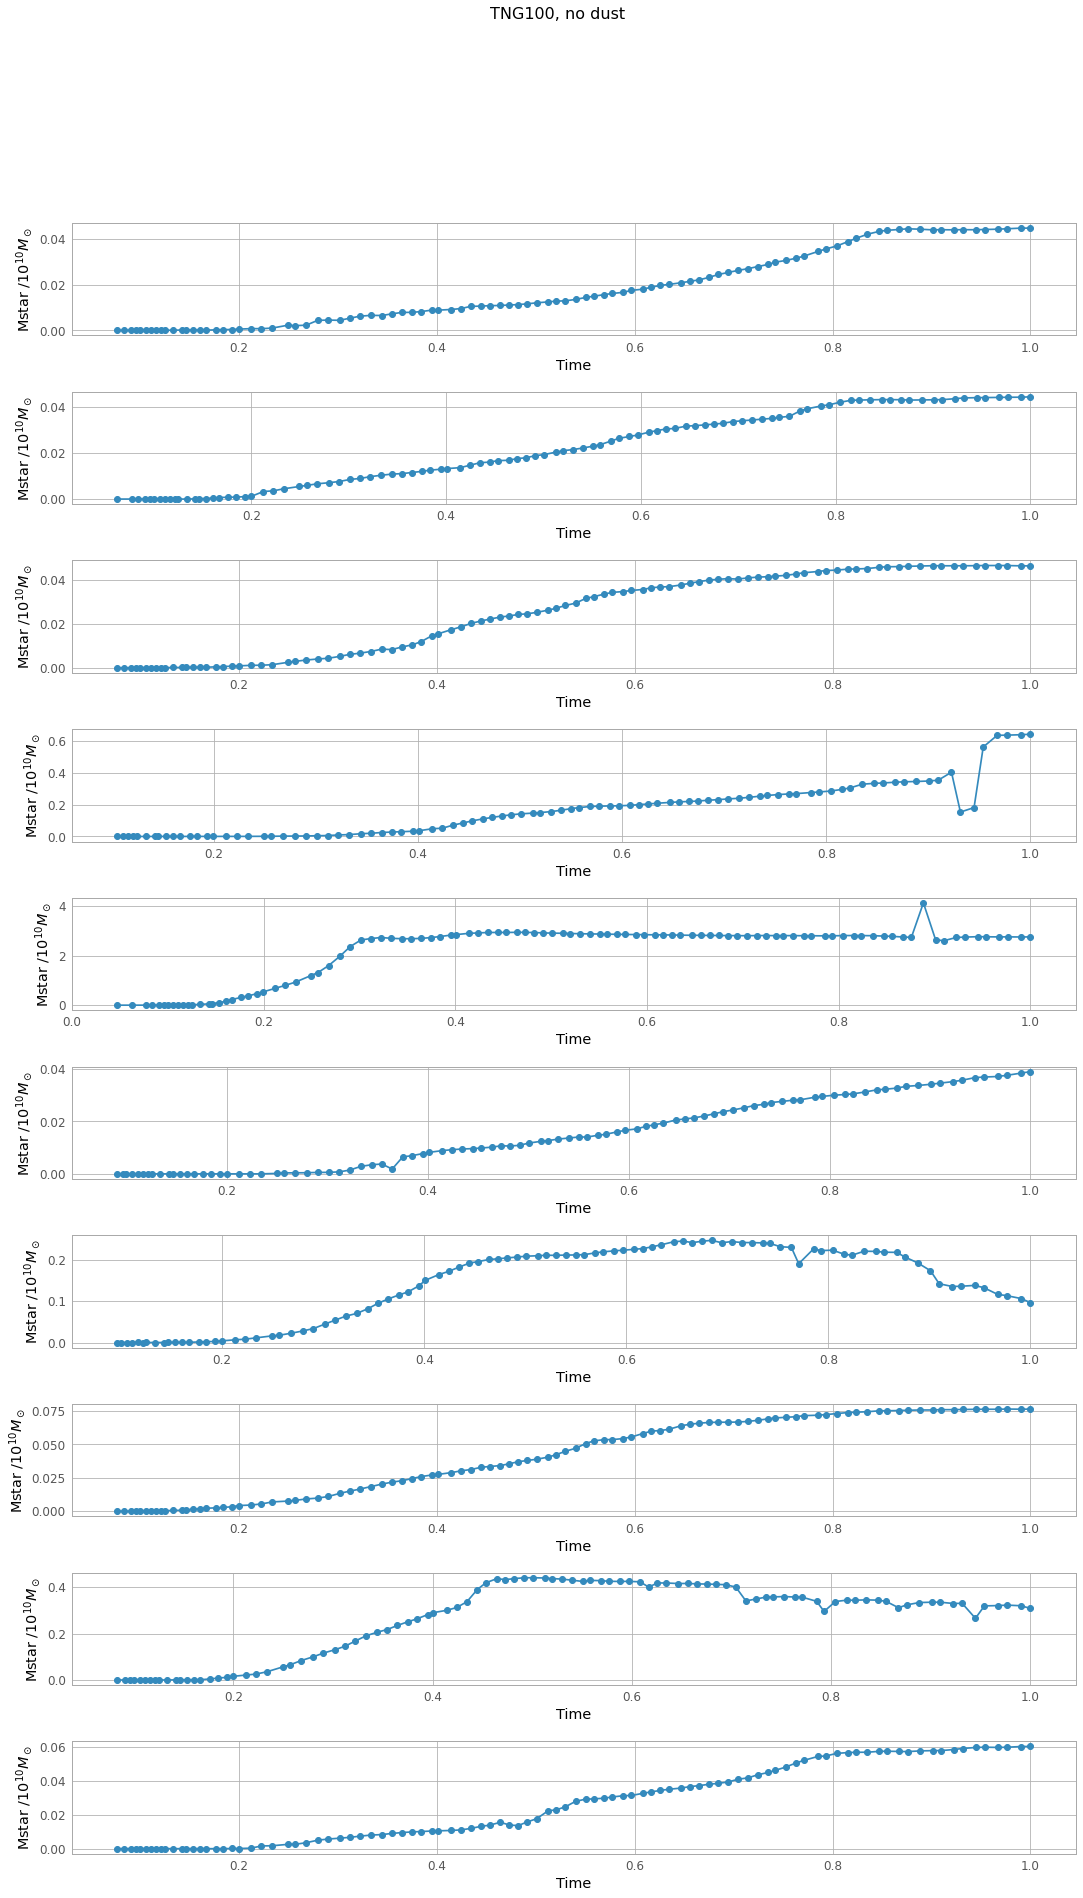

In [3]:
#plot figures
fig, axs = plt.subplots(10, 1)
fig.set_size_inches(18, 30)
fig.suptitle("TNG100, no dust", fontsize=16)

from numpy import random

seed = 1234
rng = random.default_rng(seed)

for index in range(10):
    sh = int(shids[index+rng.integers(0,high=len(shids)-20)])
    try:
      sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(sh)+".csv")
    except:
      continue  
    axs[index].plot(sfh.time,sfh.Mstar_Half, '-o')
    axs[index].set_xlabel("Time")
    axs[index].set_ylabel("Mstar $/10^{10}M_\odot$")

plt.savefig('Mstar_vs_time_examples.pdf')

In [9]:
phot_cat

,wfpc2_f439w,isaac_ks,iras_12,jwst_f356w,scuba_450wb,wfc3_uvis_f218w,pacs_100,buser_b,i2300,wfc3_ir_f140w,...,irac_1,megacam_g,cfht_i,suprimecam_g,cfht_b,u,steidel_i,steidel_g,jwst_f090w,cfht_r
subhaloIDs,,,,,,,,,,,,,,,,,,,,,
0.0,-24.320395,-26.400793,-25.570631,-25.705349,-27.993994,-19.922083,-29.543755,-24.434834,-19.953180,-26.496119,...,-25.699606,-24.806679,-25.988924,-24.726246,-24.452705,-23.045837,-25.952877,-24.729931,-26.154514,-25.559128
1.0,-22.322693,-24.340235,-23.589722,-23.651627,-26.012091,-18.069931,-27.561872,-22.433220,-18.100878,-24.443514,...,-23.645901,-22.796421,-23.954924,-22.717957,-22.450821,-21.072277,-23.920242,-22.721848,-24.115135,-23.533825
2.0,-22.888912,-24.635635,-24.749037,-24.024393,-27.284708,-20.652218,-28.834435,-22.966372,-20.656942,-24.726887,...,-24.021671,-23.251173,-24.256485,-23.188526,-22.983938,-21.858454,-24.222851,-23.192707,-24.410805,-23.867899
3.0,-21.823645,-23.439501,-23.449230,-22.838253,-25.939741,-19.421650,-27.489502,-21.893003,-19.425941,-23.534393,...,-22.835077,-22.159718,-23.094719,-22.101603,-21.910982,-20.788572,-23.063381,-22.106621,-23.239454,-22.730686
4.0,-20.946497,-22.775061,-22.521406,-22.115164,-25.059923,-18.133543,-26.609619,-21.037191,-18.140949,-22.885548,...,-22.110655,-21.354948,-22.422365,-21.285709,-21.054770,-19.818100,-22.389780,-21.289774,-22.573605,-22.025644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818395.0,-15.994128,-17.799049,-17.031420,-17.112293,-19.476505,-11.555186,-21.026249,-16.096024,-11.620710,-17.945208,...,-17.105822,-16.438700,-17.518286,-16.365351,-16.111412,-14.811857,-17.489449,-16.369492,-17.654829,-17.137823
857729.0,-15.978276,-17.787315,-16.999166,-17.096828,-19.457262,-11.492422,-21.006990,-16.080345,-11.559893,-17.933296,...,-17.090219,-16.423731,-17.504255,-16.350231,-16.095957,-14.793398,-17.475372,-16.354408,-17.640978,-17.123829
934962.0,-15.875269,-18.076677,-17.214725,-17.405313,-19.518503,-10.578411,-21.068386,-15.993908,-10.603281,-18.135752,...,-17.400011,-16.376429,-17.590429,-16.293974,-16.013342,-14.550792,-17.550209,-16.298157,-17.771168,-17.137074


In [4]:
def is_monotonic(arr):
    return np.all(np.diff(arr[::-1]) >= 0) 

In [5]:
def last_over_max(arr):
    return arr[0] / arr.max()

In [6]:
shids.min(), shids.max()

(0.0, 976607.0)

676742 @ 0: False 0.9998461447195249=0.04469747/0.044704348
674399 @ 1: False 1.0=0.044288598/0.044288598
687204 @ 2: False 0.996322574916883=0.046400182/0.046571445
405883 @ 3: False 1.0=0.6422703/0.6422703
192900 @ 4: False 0.6678353246997958=2.761689/4.1352844
649289 @ 5: False 1.0=0.039025005/0.039025005
118756 @ 6: False 0.39083206270500254=0.0966344/0.247253
292932 @ 7: False 0.9995783510423278=0.07635835/0.07639056
154513 @ 8: False 0.6994126055536016=0.3077004/0.43994117
349901 @ 9: False 1.0=0.060199432/0.060199432


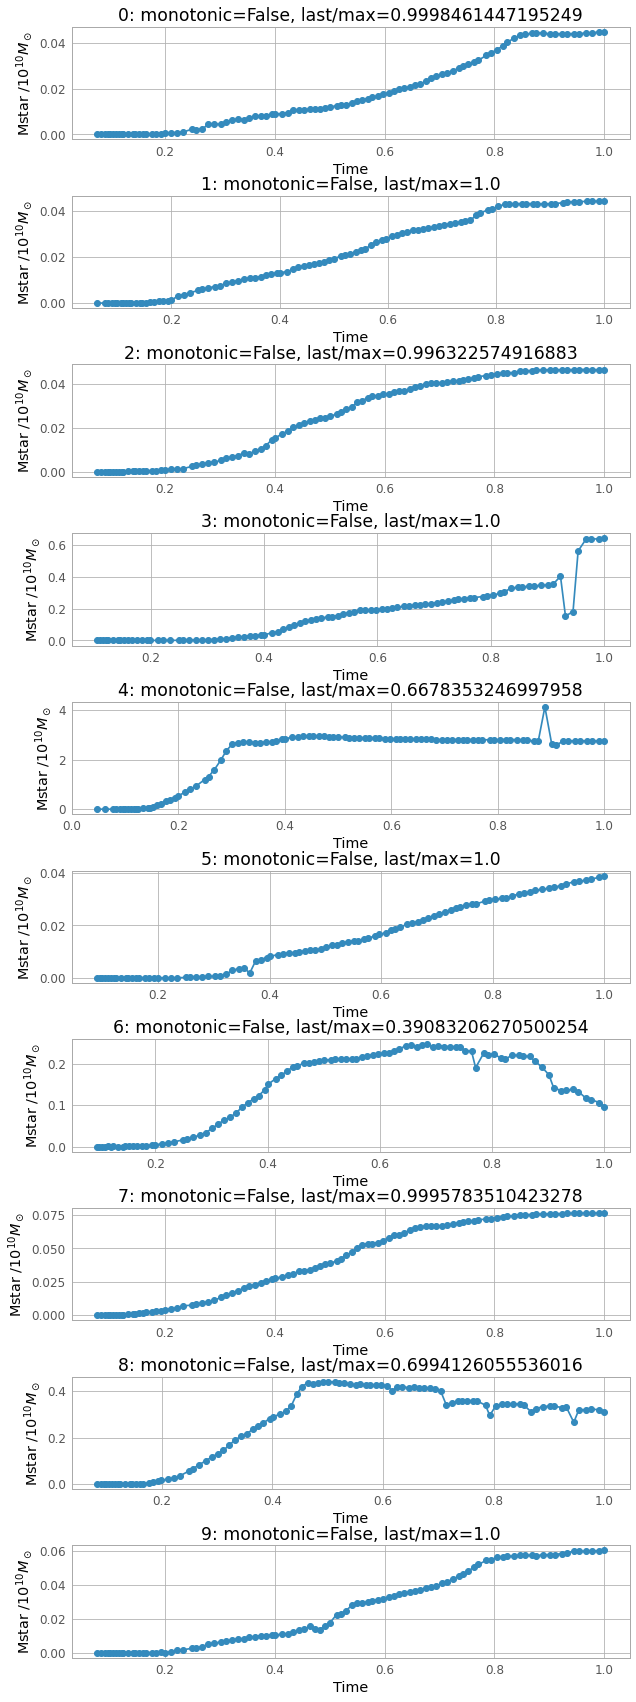

In [7]:
fig, axs = plt.subplots(10, 1)
fig.set_size_inches(10, 30)

seed = 1234
rng = random.default_rng(seed)

for index in range(10):
    shid = int(shids[index+rng.integers(0,high=len(shids)-20)])

    try:
        sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(shid)+".csv")
    except:
        print("No file for {shid} at index {idx}")
        continue
    arr = np.array(sfh.Mstar_Half)
    monotonic = is_monotonic(arr)
    ratio = last_over_max(arr)
    print(f"{shid} @ {index}: {monotonic} {ratio}={arr[0]}/{arr.max()}")
    axs[index].plot(sfh.time,sfh.Mstar_Half, '-o')
    axs[index].set_xlabel("Time")
    axs[index].set_ylabel("Mstar $/10^{10}M_\odot$")
    axs[index].set_title(f"{index}: monotonic={monotonic}, last/max={ratio}")

In [21]:
print(arr)

[6.01994320e-02 6.01438770e-02 5.97517230e-02 5.96141550e-02
 5.97541740e-02 5.96019360e-02 5.89823600e-02 5.83924600e-02
 5.77531570e-02 5.77359760e-02 5.75751330e-02 5.71527850e-02
 5.72562070e-02 5.73766860e-02 5.73221220e-02 5.67927700e-02
 5.67613880e-02 5.65813300e-02 5.61215730e-02 5.45242240e-02
 5.43514500e-02 5.19348100e-02 5.05482780e-02 4.80446600e-02
 4.60991340e-02 4.48882900e-02 4.35475400e-02 4.17028260e-02
 4.08635660e-02 3.92580030e-02 3.84899000e-02 3.79083160e-02
 3.71494330e-02 3.65518630e-02 3.56788750e-02 3.49773000e-02
 3.42873700e-02 3.34537360e-02 3.25792600e-02 3.13183500e-02
 3.11766230e-02 3.04365210e-02 2.97343580e-02 2.92981790e-02
 2.91766880e-02 2.78687120e-02 2.46824080e-02 2.27595620e-02
 2.24163630e-02 1.75865350e-02 1.57734170e-02 1.35586510e-02
 1.39810050e-02 1.55514850e-02 1.38343980e-02 1.31837650e-02
 1.19321320e-02 1.10485590e-02 1.07357595e-02 1.04993040e-02
 1.04105310e-02 1.00947150e-02 9.87712300e-03 9.48328600e-03
 8.96433200e-03 8.300751

In [33]:
a[-1]

9

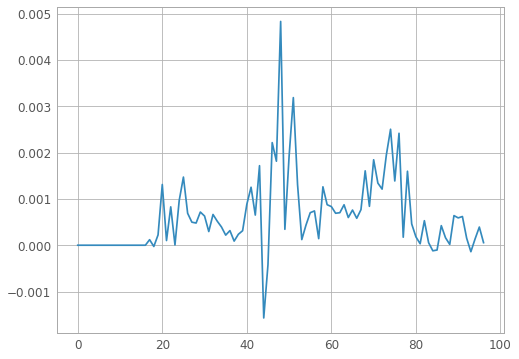

In [28]:
plt.figure()
plt.plot(np.diff(arr[::-1]))

In [8]:
ratio_last_max = np.zeros(len(shids))
monotonic = np.zeros(len(shids), dtype=bool)

n_nofile = 0

for (index, shid) in enumerate(shids):
    shid = int(shid)
    try:
        sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(shid)+".csv")
    except:
        #print(f"No file for {shid} at index {index}")
        n_nofile += 1
        continue
    arr = np.array(sfh.Mstar_Half)
    mono = is_monotonic(arr)
    ratio = last_over_max(arr)
    ratio_last_max[index] = ratio
    monotonic[index] = mono

print(f"{n_nofile} shid without file")

925 shid without file


<IPython.core.display.Javascript object>


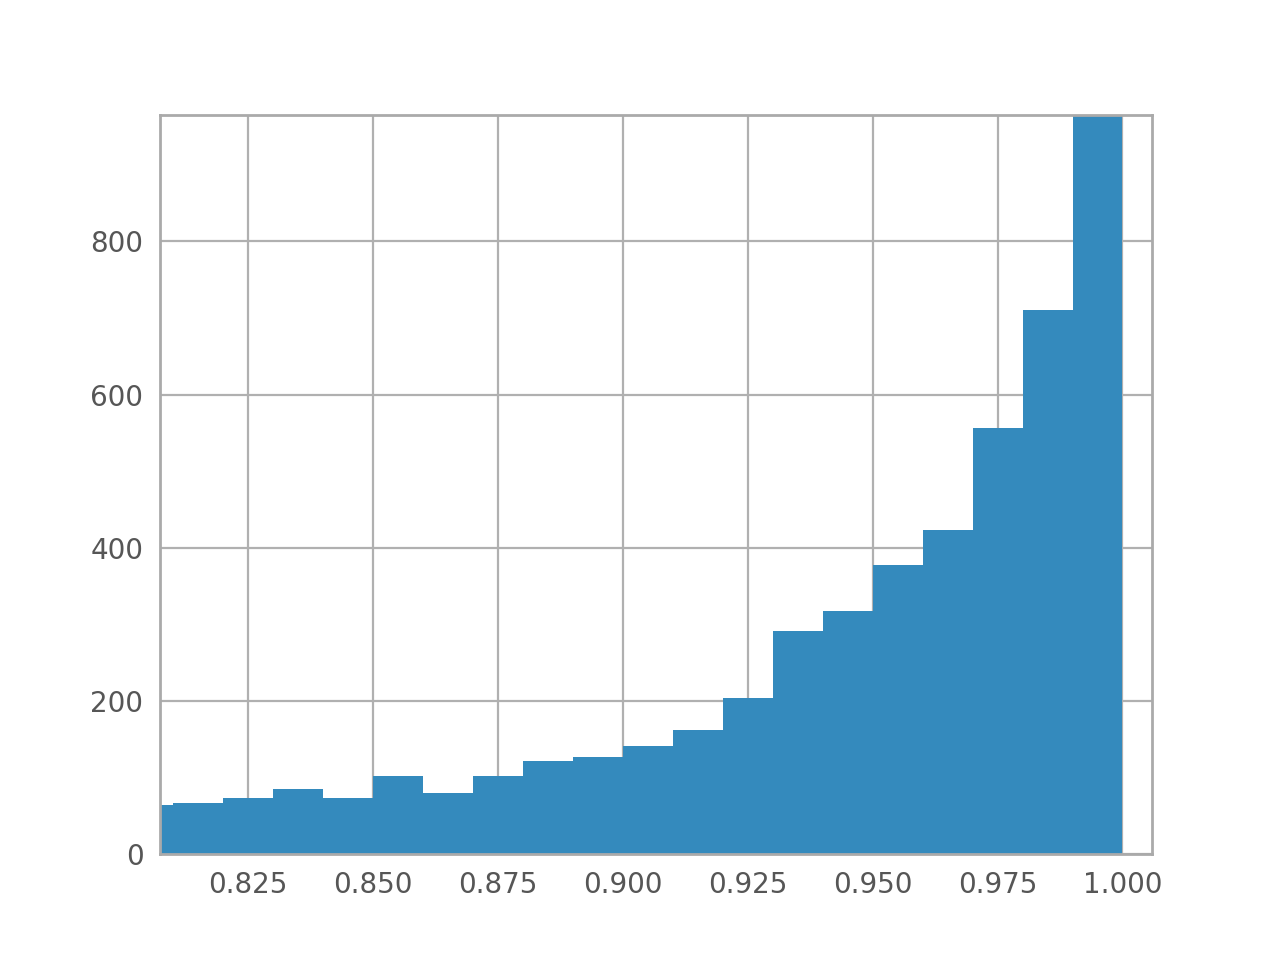

(array([9.2500e+02, 1.0000e+00, 0.0000e+00, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+00, 6.0000e+00,
        6.0000e+00, 7.0000e+00, 4.0000e+00, 9.0000e+00, 5.0000e+00,
        5.0000e+00, 1.0000e+01, 8.0000e+00, 9.0000e+00, 1.1000e+01,
        1.4000e+01, 4.0000e+00, 1.0000e+01, 8.0000e+00, 7.0000e+00,
        1.2000e+01, 1.4000e+01, 1.2000e+01, 9.0000e+00, 1.5000e+01,
        6.0000e+00, 1.2000e+01, 1.3000e+01, 1.2000e+01, 1.5000e+01,
        9.0000e+00, 1.4000e+01, 1.1000e+01, 1.0000e+01, 2.0000e+01,
        1.8000e+01, 8.0000e+00, 2.9000e+01, 1.7000e+01, 1.6000e+01,
        2.0000e+01, 2.5000e+01, 2.2000e+01, 2.0000e+01, 2.6000e+01,
        2.3000e+01, 2.7000e+01, 3.0000e+01, 2.1000e+01, 2.9000e+01,
        2.8000e+01, 2.5000e+01, 4.1000e+01, 2.8000e+01, 2.5000e+01,
        3.3000e+01, 3.5000e+01, 3.8000e+01, 3.5000e+01, 4.0000e+01,
        4.2000e+01, 3.9000e+01, 5.0000e+01, 4.30

In [10]:
%matplotlib notebook
plt.hist(ratio_last_max, bins=100)

In [30]:
w = np.where((ratio_last_max > 0.99) & (ratio_last_max <=1.0))

In [31]:
len(w[0])

16029

<IPython.core.display.Javascript object>


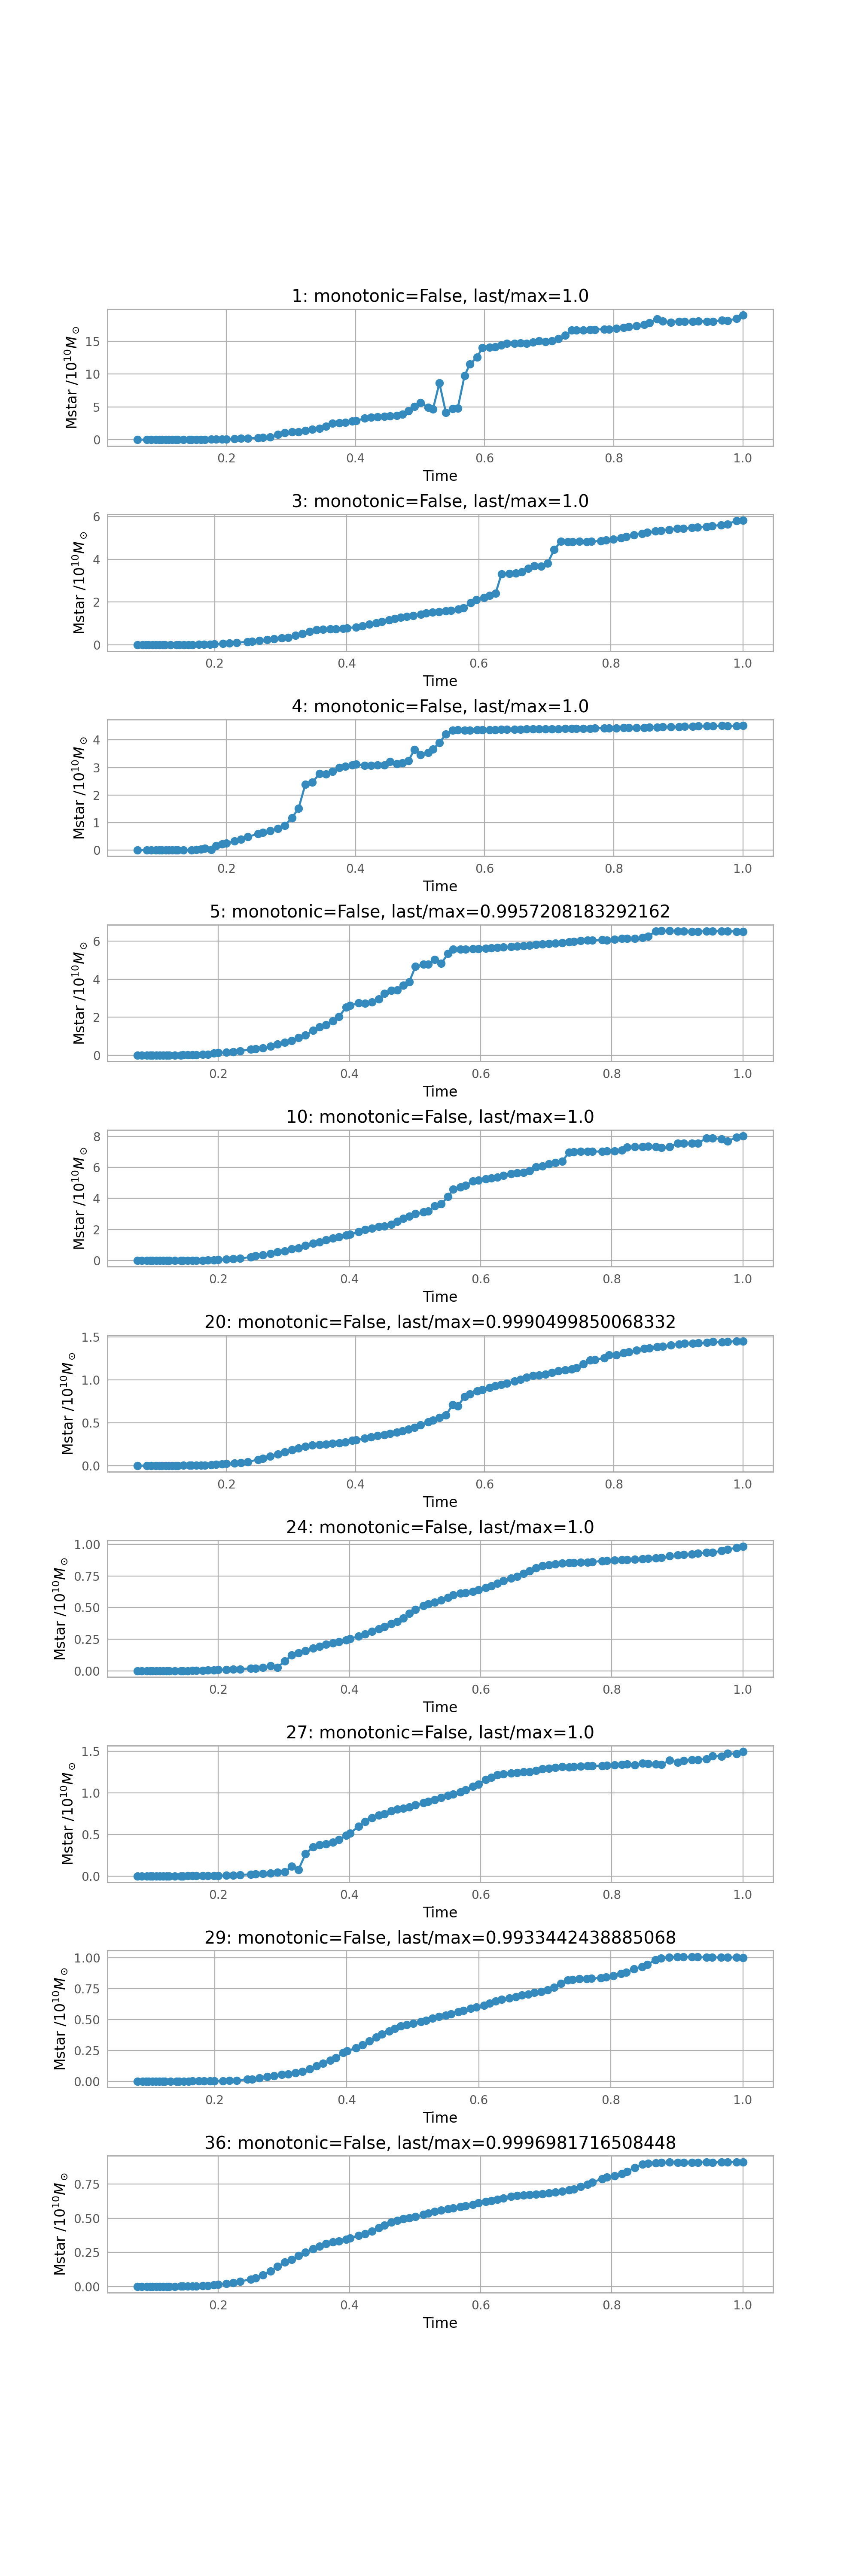

1 @ 1: False 1.0=18.926231/18.926231
3 @ 3: False 1.0=5.8104267/5.8104267
4 @ 4: False 1.0=4.5162363/4.5162363
5 @ 5: False 0.9957208183292162=6.5080705/6.5360394
10 @ 10: False 1.0=8.019492/8.019492
20 @ 20: False 0.9990499850068332=1.4502822/1.4516613
24 @ 24: False 1.0=0.9834423/0.9834423
27 @ 27: False 1.0=1.4948293/1.4948293
29 @ 29: False 0.9933442438885068=1.0013056/1.0080147
36 @ 36: False 0.9996981716508448=0.9107064/0.91098136


In [32]:
fig, axs = plt.subplots(10, 1)
fig.set_size_inches(10, 30)

for axidx, index in enumerate(w[0][:10]):
    shid = int(shids[index])

    try:
        sfh = pd.read_csv(sfh_path+"TNG100_mainprojenitors_"+str(shid)+".csv")
    except:
        print("No file for {shid} at index {idx}")
        continue
    arr = np.array(sfh.Mstar_Half)
    monotonic = is_monotonic(arr)
    ratio = last_over_max(arr)
    print(f"{shid} @ {index}: {monotonic} {ratio}={arr[0]}/{arr.max()}")
    axs[axidx].plot(sfh.time,sfh.Mstar_Half, '-o')
    axs[axidx].set_xlabel("Time")
    axs[axidx].set_ylabel("Mstar $/10^{10}M_\odot$")
    axs[axidx].set_title(f"{index}: monotonic={monotonic}, last/max={ratio}")

In [23]:
monotonic.sum()

0

In [25]:
np.save('ratio_last_max.npy', ratio_last_max)

In [21]:
TNG100_PATH="/gpfswork/rech/qrc/commun/SFH/tng100"

def read_tng_file(shid: int):
    """Read TNG100 SFH file for the given sub-halo *shid*
    """
    shid = int(shid)
    filename = os.path.join(
            TNG100_PATH,
            'cats_SFH',
            f'TNG100_mainprojenitors_{shid}.csv'
        )
    sfh = pd.read_csv(filename)
    return sfh


In [22]:
sfh = read_tng_file(9)

In [23]:
sfh

,Unnamed: 0,SnapNUm,SubfindID,redshift,time,SFR_halfRad,SFR_Rad,SFR_Max,Mstar_Half,Mstar
0,0,99,9,2.220446e-16,1.000000,0.000000,0.000000,0.000000,6.811788,10.131315
1,1,98,10,9.521667e-03,0.990568,0.000000,0.000000,0.000000,6.700008,10.037998
2,2,97,10,2.397443e-02,0.976587,0.000000,0.000000,0.000000,6.640936,9.957660
3,3,96,8,3.372437e-02,0.967376,0.000000,0.000000,0.000000,6.771295,10.073299
4,4,95,7,4.852363e-02,0.953722,0.000000,0.000000,0.000000,6.745054,10.067614
...,...,...,...,...,...,...,...,...,...,...
94,94,5,23804,9.388771e+00,0.096258,0.050711,0.050711,0.050711,0.000368,0.000609
95,95,4,15807,9.996590e+00,0.090937,0.009459,0.041704,0.058432,0.000327,0.000477
96,96,3,12872,1.097564e+01,0.083503,0.000000,0.000000,0.048688,0.000000,0.000000
97,97,2,7507,1.198021e+01,0.077040,0.000000,0.000000,0.032489,0.000000,0.000000


In [24]:
sfh['SFR_halfRad']

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
        ...   
94    0.050711
95    0.009459
96    0.000000
97    0.000000
98    0.000000
Name: SFR_halfRad, Length: 99, dtype: float64

In [25]:
arr = sfh['SFR_halfRad']
arr.shape

(99,)

In [37]:
import os
import pandas as pd

TNG100_PATH="/gpfswork/rech/qrc/commun/SFH/tng100"

def read_tng_file(shid: int):
    """Read TNG100 SFH file for the given sub-halo *shid* 
    """
    shid = int(shid)
    filename = os.path.join(
            TNG100_PATH,
            'cats_SFH',
            f'TNG100_mainprojenitors_{shid}.csv'
        )
    sfh = pd.read_csv(filename)
    return sfh

def read_phot_cat(path=None):
    """Read the photometry catalog
    """
    if path is None:
        path = TNG100_PATH
    filename = os.path.join(TNG100_PATH, 'phot_TNG100_dylan_143.csv')
    phot_cat = pd.read_csv(filename)
    phot_cat.set_index("subhaloIDs", inplace=True)
    return phot_cat

def create_data_array(phot_cat, limit=None):
    """Create the array of data using the given photometry catalog.
    Optionally limit the number of rows to the given limit.
    """
    dims = (limit, 1 + 143 + 2*100)
    arr = np.zeros(dims)
    for index, (shid, fluxes) in enumerate(phot_cat.iterrows()):
        if index >= limit:
            break
        arr[i, 0] = shid
        arr[i, 1:144] = fluxes.array
        try:
            sfh = read_tng_file(shid)
        except:
            continue
        sfr_half_rad = sfh['SFR_halfRad'].array
        n = sfr_half_rad.shape[0]
        arr[i, 144:144+n] = sfr_half_rad
        sfr_mstar_half = sfh['Mstar_Half'].array
        n = sfr_mstar_half.shape[0]
        arr[i, 244:244+n] = sfr_mstar_half
    return arr



In [27]:
class SubHalos:
    def __init__(self, path=None):
        if path is None:
            path = TNG100_PATH
        phot_cat = read_phot_cat()
        self.data = create_data_array(phot_cat)

In [29]:
phot_cat = read_phot_cat()

In [38]:
data = create_data_array(phot_cat, limit=100)

In [39]:
data.shape

(100, 344)

In [64]:
sfh = read_tng_file(9)

In [61]:
sfh.shape

(99, 10)

In [67]:
sfh

,Unnamed: 0,SnapNUm,SubfindID,redshift,time,SFR_halfRad,SFR_Rad,SFR_Max,Mstar_Half,Mstar
0,0,99,9,2.220446e-16,1.000000,0.000000,0.000000,0.000000,6.811788,10.131315
1,1,98,10,9.521667e-03,0.990568,0.000000,0.000000,0.000000,6.700008,10.037998
2,2,97,10,2.397443e-02,0.976587,0.000000,0.000000,0.000000,6.640936,9.957660
3,3,96,8,3.372437e-02,0.967376,0.000000,0.000000,0.000000,6.771295,10.073299
4,4,95,7,4.852363e-02,0.953722,0.000000,0.000000,0.000000,6.745054,10.067614
...,...,...,...,...,...,...,...,...,...,...
94,94,5,23804,9.388771e+00,0.096258,0.050711,0.050711,0.050711,0.000368,0.000609
95,95,4,15807,9.996590e+00,0.090937,0.009459,0.041704,0.058432,0.000327,0.000477
96,96,3,12872,1.097564e+01,0.083503,0.000000,0.000000,0.048688,0.000000,0.000000
97,97,2,7507,1.198021e+01,0.077040,0.000000,0.000000,0.032489,0.000000,0.000000


In [44]:
sfh.columns

Index(['Unnamed: 0', 'SnapNUm', 'SubfindID', 'redshift', 'time', 'SFR_halfRad',
       'SFR_Rad', 'SFR_Max', 'Mstar_Half', 'Mstar'],
      dtype='object')

In [46]:
colidxname = sfh.columns[0]
indices = sfh[colidxname]

In [59]:
sfh.shape

(1, 10)

In [48]:
np.all(np.diff(indices) == np.ones(sfh.shape[0]-1))

True

In [65]:
indices = sfh['SnapNUm']

In [66]:
indices

0     99
1     98
2     97
3     96
4     95
      ..
94     5
95     4
96     3
97     2
98     1
Name: SnapNUm, Length: 99, dtype: int64

In [114]:
def check_sfh(sfh):
    """Check the sfh data and interpolate intermediate missing data 
    """
    # Check number of line
    nlines = sfh.shape[0]
    # consecutive index
    indices = sfh['SnapNUm']
    diff = np.diff(indices)
    consec = np.all(diff == -np.ones(sfh.shape[0]-1))
    if diff.size > 0:
        min_hole_size = diff.min()
        n_holes = np.sum(diff < -1)
    else:
        min_hole_size = -1
        n_holes = 0
    start_at_99 = indices[0] == 99
    return nlines, consec, n_holes, min_hole_size, start_at_99

In [116]:
limit = 25000
not_consec = 0
more_than_100 = 0
n_bad_start = 0
min_hole_sizes = []
n_holes = []
hole_shids = []
shids = []
total = 0
for index, (shid, fluxes) in enumerate(phot_cat.iterrows()):
    if index >= limit:
        break
    try:
        sfh = read_tng_file(shid)
    except:
        #print(f"No file at index {index}, shid={shid}")
        continue
    total += 1
    nlines, consec, nh, min_hole_size, start_at_99 = check_sfh(sfh)
    if not consec:
        not_consec += 1
    if nlines > 100:
        more_than_100 += 1
    n_holes.append(nh)
    shids.append(shid)
    min_hole_sizes.append(min_hole_size)
    if min_hole_size < -1:
        hole_shids.append(shid)
    if not start_at_99:
        n_bad_start += 1

In [117]:
print(f"Number of non-consecutive index in sfh file: {not_consec}/{total} ({phot_cat.shape[0]})")
print(f"Number with more than 100 lines: {more_than_100}/{total}")
print(f"Number not starting at 99: {n_bad_start}/{total}")
print(f"Min hole size {max(min_hole_sizes)}")
print(f"max n_holes: {max(n_holes)}")

Number of non-consecutive index in sfh file: 2298/21574 (22499)
Number with more than 100 lines: 0/21574
Number not starting at 99: 0/21574
Min hole size -1
max n_holes: 7


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [184]:
def interpolate_sfh(sfh):
    new_rows = []
    prev = None
    shift = 0
    for i, row in sfh.iterrows():
        if prev is None:
            new_rows.append(row)
            prev = i, row
            continue
        prev_i, prev_row = prev
        gap = prev_row['SnapNUm'] - row['SnapNUm']
        if gap > 1:
            print(gap)
            assert gap == 2
            # create an interpolated row
            new_row = 0.5 * (prev_row + row)
            #new_row['Unnamed: 0'] = i + shift
            shift += 1
            new_rows.append(new_row)
        new_rows.append(row)
        prev = i, row
    new_shf = pd.DataFrame(new_rows, index=list(range(len(new_rows))))
    new_shf.drop(columns='Unnamed: 0', inplace=True)
    return new_shf

In [185]:
sfh = read_tng_file(hole_shids[0])

In [186]:
new_shf = interpolate_shf(sfh)

2.0


In [187]:
new_shf

,SnapNUm,SubfindID,redshift,time,SFR_halfRad,SFR_Rad,SFR_Max,Mstar_Half,Mstar
0,99.0,4.0,2.220446e-16,1.000000,0.000000,0.283784,1.362914,4.516236,6.276475
1,98.0,4.0,9.521667e-03,0.990568,0.000000,0.094561,1.294988,4.513702,6.232760
2,97.0,4.0,2.397443e-02,0.976587,0.000000,0.218741,1.654206,4.512415,6.232610
3,96.0,372637.0,3.372437e-02,0.967376,0.000000,0.135014,1.847507,4.516105,6.234114
4,95.0,370000.0,4.852363e-02,0.953722,0.000000,0.412360,1.025478,4.503638,6.233662
5,94.0,369700.0,5.850732e-02,0.944727,0.000000,0.258778,1.242066,4.502712,6.237119
6,93.0,366711.0,7.366138e-02,0.931392,0.000000,0.571748,1.714455,4.503045,6.242934
7,92.0,367726.0,8.388443e-02,0.922608,0.000000,0.365979,1.613681,4.491201,6.221999
8,91.0,365313.0,9.940180e-02,0.909586,0.000000,0.192313,1.507138,4.483116,6.198270
9,90.0,363624.0,1.098699e-01,0.901006,0.000000,0.484272,1.729246,4.479113,6.222069


In [188]:
sfh

,Unnamed: 0,SnapNUm,SubfindID,redshift,time,SFR_halfRad,SFR_Rad,SFR_Max,Mstar_Half,Mstar
0,0,99,4,2.220446e-16,1.000000,0.000000,0.283784,1.362914,4.516236,6.276475
1,1,98,4,9.521667e-03,0.990568,0.000000,0.094561,1.294988,4.513702,6.232760
2,2,97,4,2.397443e-02,0.976587,0.000000,0.218741,1.654206,4.512415,6.232610
3,3,96,372637,3.372437e-02,0.967376,0.000000,0.135014,1.847507,4.516105,6.234114
4,4,95,370000,4.852363e-02,0.953722,0.000000,0.412360,1.025478,4.503638,6.233662
5,5,94,369700,5.850732e-02,0.944727,0.000000,0.258778,1.242066,4.502712,6.237119
6,6,93,366711,7.366138e-02,0.931392,0.000000,0.571748,1.714455,4.503045,6.242934
7,7,92,367726,8.388443e-02,0.922608,0.000000,0.365979,1.613681,4.491201,6.221999
8,8,91,365313,9.940180e-02,0.909586,0.000000,0.192313,1.507138,4.483116,6.198270
9,9,90,363624,1.098699e-01,0.901006,0.000000,0.484272,1.729246,4.479113,6.222069


In [155]:
prev_row

Unnamed: 0       96.000000
SnapNUm           2.000000
SubfindID      3231.000000
redshift         11.980213
time              0.077040
SFR_halfRad       0.022747
SFR_Rad           0.044503
SFR_Max           0.046621
Mstar_Half        0.000094
Mstar             0.000307
Name: 96, dtype: float64

In [156]:
new_row = 0.5 * (row+prev_row)

In [157]:
new_row

Unnamed: 0       96.500000
SnapNUm           1.500000
SubfindID      3428.500000
redshift         13.484693
time              0.069791
SFR_halfRad       0.011373
SFR_Rad           0.022252
SFR_Max           0.032264
Mstar_Half        0.000047
Mstar             0.000153
dtype: float64

In [14]:
"""Create a pickle containing:
    - wavelength array (143 elements) corresponding to SED fluxes
    - time and reshift arrays (100 elements each) with snapshot times and 
      redshifts
    - a 2D array with one row per galaxy, each row containing:
      shid, 143xFluxes, 100xM_star_Half, 100xSFR_HakfRad
"""

import os
import pandas as pd
import numpy as np

TNG100_PATH="/gpfswork/rech/qrc/commun/SFH/tng100"

def read_tng_file(shid: int):
    """Read TNG100 SFH file for the given sub-halo *shid* 
    """
    shid = int(shid)
    filename = os.path.join(
            TNG100_PATH,
            'cats_SFH',
            f'TNG100_mainprojenitors_{shid}.csv'
        )
    sfh = pd.read_csv(filename)
    return sfh

def read_phot_cat(path=None):
    """Read the photometry catalog
    """
    if path is None:
        path = TNG100_PATH
    filename = os.path.join(TNG100_PATH, 'phot_TNG100_dylan_143.csv')
    phot_cat = pd.read_csv(filename)
    phot_cat.set_index("subhaloIDs", inplace=True)
    return phot_cat

def interpolate_sfh(sfh):
    """Linearly interpolate missing lines in SFH data.

    Algo: loop over rows, if a row is missing (SnapNUm make a jump > 1),
    add a new row equal to the mean between previous and current row.
    (NB: We don't try to add missing rows at the end.)
    """
    new_rows = []
    prev = None
    for i, row in sfh.iterrows():
        if prev is None:
            new_rows.append(row)
            prev = i, row
            continue
        prev_i, prev_row = prev
        gap = prev_row['SnapNUm'] - row['SnapNUm']
        if gap > 1:
            #print(gap)
            assert gap == 2
            # create an interpolated row
            new_row = 0.5 * (prev_row + row)
            #new_row['Unnamed: 0'] = i + shift
            new_rows.append(new_row)
        new_rows.append(row)
        prev = i, row
    new_shf = pd.DataFrame(new_rows, index=list(range(len(new_rows))))
    # We remove this comlum as we give the index explicitly above
    new_shf.drop(columns='Unnamed: 0', inplace=True)
    return new_shf

def create_data_array(phot_cat, limit=None):
    """Create the array of data using the given photometry catalog.
    Optionally limit the number of rows to the given limit.
    """
    dims = (limit, 1 + 143 + 2*100)
    arr = np.zeros(dims)
    for index, (shid, fluxes) in enumerate(phot_cat.iterrows()):
        if index >= limit:
            break
        arr[index, 0] = shid
        arr[index, 1:144] = fluxes.array
        try:
            sfh = read_tng_file(shid)
        except:
            continue
        # interpolate sfh
        sfh = interpolate_sfh(sfh)
        # populate the data array
        sfr_half_rad = sfh['SFR_halfRad'].array
        n = sfr_half_rad.shape[0]
        arr[index, 144:144+n] = sfr_half_rad
        sfr_mstar_half = sfh['Mstar_Half'].array
        n = sfr_mstar_half.shape[0]
        arr[index, 244:244+n] = sfr_mstar_half
    return arr

def read_wavelength(path=None):
    if path is None:
        path = TNG100_PATH
    wl_filename = os.path.join(path, 'wl.csv')
    wl = np.loadtxt(wl_filename, delimiter=',')
    return wl

In [9]:
phot_cat = read_phot_cat()
data = create_data_array(phot_cat, limit=100)

In [10]:
data.shape

(100, 344)

In [11]:
data[0, 0]

0.0

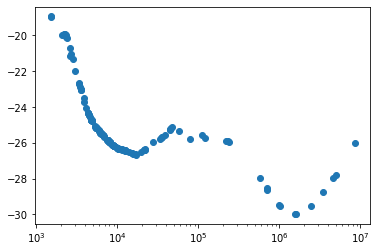

In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

wl = read_wavelength()
plt.semilogx(wl, data[0, 1:144], 'o')

In [24]:
# Check time[SnapNum] are the same in all SFH

all_sfh_times = [set() for i in range(100)]

limit = 25000

for index, (shid, fluxes) in enumerate(phot_cat.iterrows()):
    if index >= limit:
        break
    try:
        sfh = read_tng_file(shid)
    except:
        #print(f"No file at index {index}, shid={shid}")
        continue
    snap_num = np.asarray(sfh['SnapNUm'], dtype=int)
    times = np.asarray(sfh['time'], dtype=float)
    for i, t in zip(snap_num, times):
        all_sfh_times[i].add(t)

# should be True : OK
assert np.all([len(x) == 1 for x in all_sfh_times])

In [49]:
t = [s.pop() for s in all_sfh_times]

In [50]:
t

[0.0475138587487956,
 0.0625423206683166,
 0.0770403363726896,
 0.0835028211377591,
 0.0909372776111761,
 0.0962577742664274,
 0.099976606932012,
 0.1058259705456833,
 0.1109610307829075,
 0.116345262783017,
 0.1214140944240273,
 0.1249154159378313,
 0.1334828742744916,
 0.1426379409683697,
 0.1460576040687806,
 0.1531448492046431,
 0.1605759932010687,
 0.1667797024949483,
 0.1765375363843931,
 0.1842287739031916,
 0.1931682227600717,
 0.1996826997385783,
 0.2123694923132991,
 0.2226744309777334,
 0.2334794026729061,
 0.2494928389637798,
 0.2566876761756205,
 0.2678708269437177,
 0.2795411957308694,
 0.2903410187891416,
 0.3015580833126119,
 0.3117279402557108,
 0.3222407692362591,
 0.3331081367707903,
 0.344341999449342,
 0.3542720825792927,
 0.3644885279628326,
 0.3749995936718436,
 0.3839899945738943,
 0.395063440663206,
 0.4007193446803742,
 0.4142333528772864,
 0.4241643607295944,
 0.4343334588184266,
 0.4447463552211064,
 0.4532561302374954,
 0.4641226868709222,
 0.47300320854109

In [27]:
phot_cat = read_phot_cat()
data = create_data_array(phot_cat, limit=100)

In [28]:
np.save('rawdata.npy', data)

In [35]:
# Let's try to create an API aroudnthe raw data

class SubHalos:
    def __init__(self, filename):
        self.data = np.load(filename)
    
    def __getitem__(self, i):
        subhalo = SubHalo(self.data[i])
        return subhalo
    
class SubHalo:
    def __init__(self, row):
        self.row = row
    
    def fluxes(self):
        return self.row[1:144]
    
    def shid(self):
        return self.row[0]
    
    def mstarhalf(self):
        return self.row[244:344]
    
    def sfrhalfrad(self):
        return self.row[144:244]

In [38]:
wl = read_wavelength()

In [40]:
subhalos = SubHalos('rawdata.npy')

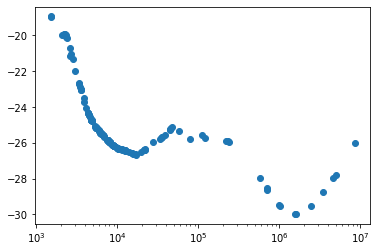

In [47]:
plt.semilogx(wl, subhalos[0].fluxes(), 'o')

In [42]:
subhalo = subhalos[0]

In [46]:
subhalo.fluxes()

array([-24.32039452, -26.40079308, -25.57063103, -25.70534897,
       -27.99399376, -19.9220829 , -29.54375458, -24.43483353,
       -19.95318031, -26.49611855, -25.96131516, -25.95235634,
       -26.60742569, -26.34811783, -23.05036736, -25.56091499,
       -25.90168762, -26.12848473, -26.32854843, -25.47737312,
       -26.28164482, -25.9328537 , -26.33120155, -26.44605827,
       -18.9444828 , -26.403265  , -25.77240944, -25.83562851,
       -25.7475853 , -25.18942642, -25.91131401, -25.73133087,
       -25.10151863, -25.44373322, -26.25489616, -26.10013008,
       -25.93816376, -22.98906708, -25.49025917, -26.29120064,
       -26.18130875, -25.56548882, -24.34741402, -26.39800644,
       -25.6053791 , -24.75108719, -25.88923264, -19.9330864 ,
       -26.37195206, -22.86170578, -24.04181671, -26.16111946,
       -23.70484543, -25.16462898, -24.73421288, -26.17881584,
       -22.67383385, -27.78504753, -25.13630867, -25.18300629,
       -19.99808121, -25.55692863, -25.31225014, -29.48